In [116]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist


In [118]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [119]:
print("Eğitim verileri boyutu:", X_train.shape)
print("Eğitim etiketleri boyutu:", y_train.shape)
print("Test verileri boyutu:", X_test.shape)
print("Test etiketleri boyutu:", y_test.shape)


Eğitim verileri boyutu: (60000, 28, 28)
Eğitim etiketleri boyutu: (60000,)
Test verileri boyutu: (10000, 28, 28)
Test etiketleri boyutu: (10000,)


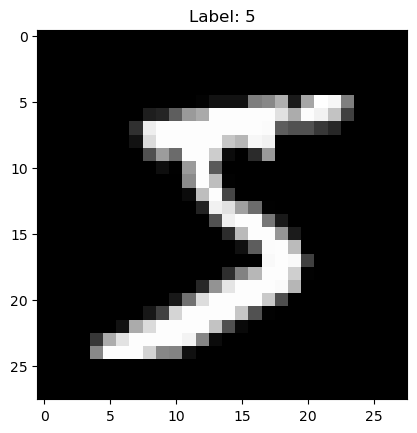

In [120]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [121]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9138 - loss: 0.2934 - val_accuracy: 0.9808 - val_loss: 0.0569
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9796 - val_loss: 0.0669
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9846 - val_loss: 0.0441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9944 - loss: 0.0193 - val_accuracy: 0.9872 - val_loss: 0.0397
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9850 - val_loss: 0.0492
313/313 - 1s - 3ms/step - accuracy: 0.9850 - loss: 0.0492
Test doğruluğu: 0.9850000143051147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


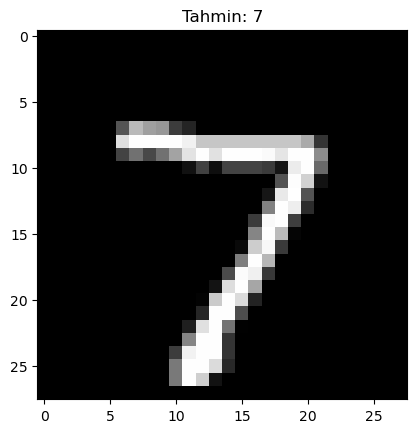

In [122]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test doğruluğu: {test_acc}")
sample = X_test[0]
prediction = model.predict(np.expand_dims(sample, axis=0))
plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"Tahmin: {np.argmax(prediction)}")
plt.show()

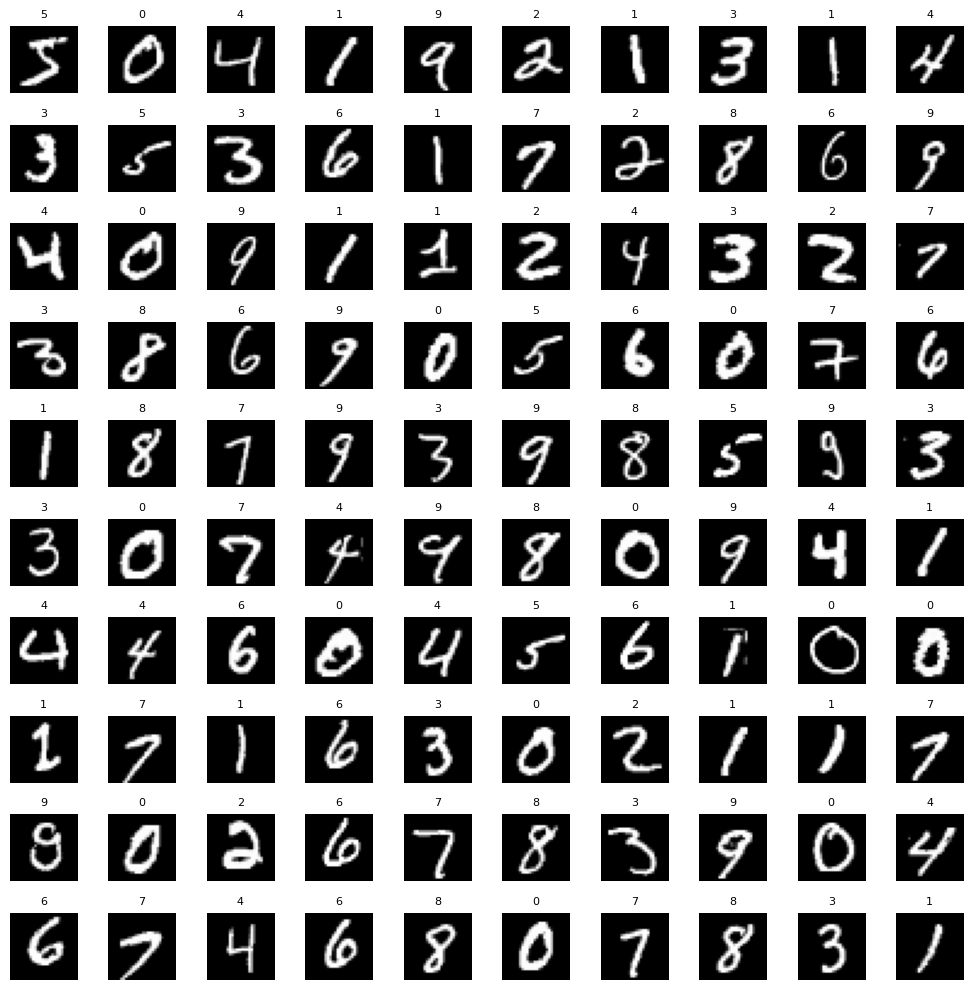

In [123]:
import matplotlib.pyplot as plt

num_images = 100
grid_size = int(num_images**0.5)  

# Grid oluştur ve digitleri yerleştir
fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))  # 10x10 grid
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')  # Görüntüyü ekle
    ax.set_title(f"{y_train[i]}", fontsize=8)  # Etiket (label) ekle
    ax.axis('off')  # Eksenleri kaldır
plt.tight_layout()
plt.show()

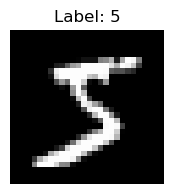

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))  # Görüntü boyutunu küçültmek için
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')  # İsteğe bağlı: eksenleri kaldırmak için
plt.show()


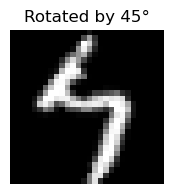

In [125]:
from skimage.transform import rotate

# Görüntüyü saat yönünde 45 derece döndürme
rotated_image = rotate(X_train[0], angle=45, resize=False)
plt.figure(figsize=(2, 2))
# Görüntüyü göster
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated by 45°")
plt.axis('off')
plt.show()

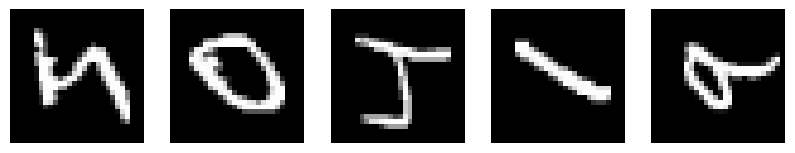

In [126]:
rotated_images = [rotate(img, angle=90, resize=False) for img in X_train[:5]]

# Döndürülen görüntüleri görselleştirme
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(rotated_images[i], cmap='gray')
    ax.axis('off')
plt.show()

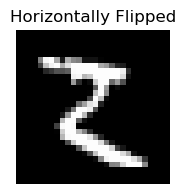

In [127]:
flipped_image_h = np.fliplr(X_train[0])  # NumPy kullanarak yatay çevir
plt.figure(figsize=(2, 2))
# Görüntüyü göster
plt.imshow(flipped_image_h, cmap='gray')
plt.title("Horizontally Flipped")
plt.axis('off')
plt.show()

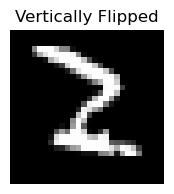

In [128]:
flipped_image_v = np.flipud(X_train[0])  # NumPy kullanarak dikey çevir
plt.figure(figsize=(2, 2))
# Görüntüyü göster
plt.imshow(flipped_image_v, cmap='gray')
plt.title("Vertically Flipped")
plt.axis('off')
plt.show()

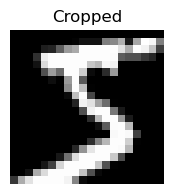

In [129]:
# Görüntünün orta kısmını kes
cropped_image = X_train[0][4:24, 4:24]  # (4, 24) arasında piksel kesme
plt.figure(figsize=(2, 2))
# Görüntüyü göster
plt.imshow(cropped_image, cmap='gray')
plt.title("Cropped")
plt.axis('off')
plt.show()

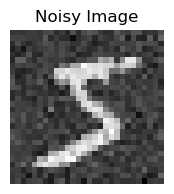

In [130]:
noise = np.random.normal(0, 0.1, X_train[0].shape)
noisy_image = X_train[0] + noise
plt.figure(figsize=(2, 2))
# Görüntüyü göster
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

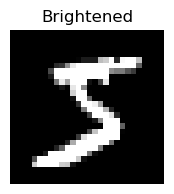

In [131]:
bright_image = np.clip(X_train[0] * 1.5, 0, 1)
plt.figure(figsize=(2, 2))
plt.imshow(bright_image, cmap='gray')
plt.title("Brightened")
plt.axis('off')
plt.show()

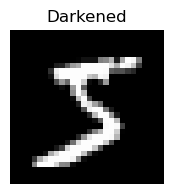

In [132]:
dark_image = np.clip(X_train[0] * 0.5, 0, 1)
plt.figure(figsize=(2, 2))
plt.imshow(dark_image, cmap='gray')
plt.title("Darkened")
plt.axis('off')
plt.show()

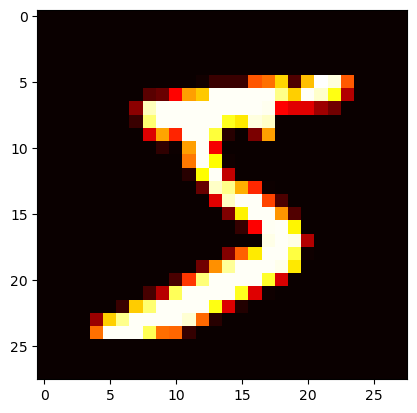

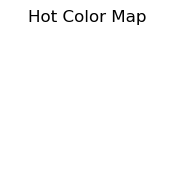

In [133]:
plt.imshow(X_train[0], cmap='hot')  
plt.figure(figsize=(2, 2))
plt.title("Hot Color Map")
plt.axis('off')
plt.show()

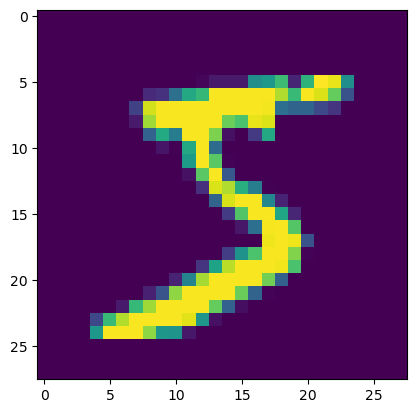

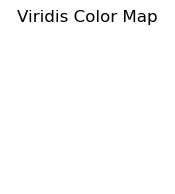

In [134]:
plt.imshow(X_train[0], cmap='viridis')  
plt.figure(figsize=(2, 2))
plt.title("Viridis Color Map")
plt.axis('off')
plt.show()

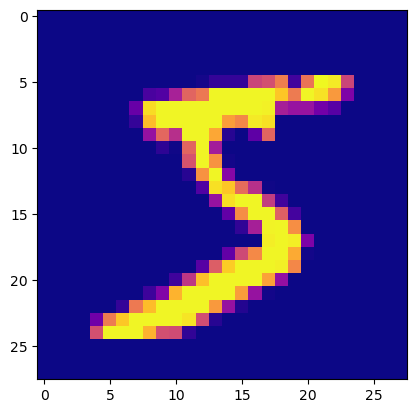

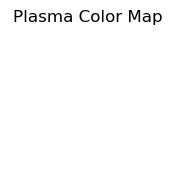

In [135]:
plt.imshow(X_train[0], cmap='plasma')  
plt.figure(figsize=(2, 2))
plt.title("Plasma Color Map")
plt.axis('off')
plt.show()

In [136]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


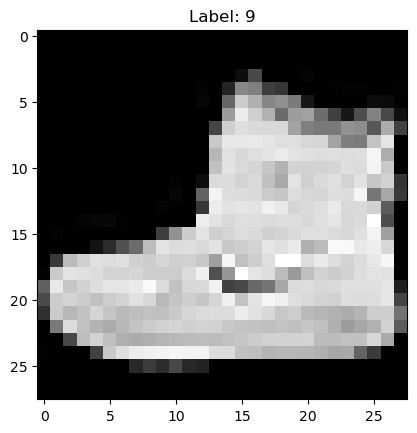

In [137]:
from tensorflow.keras.datasets import fashion_mnist

# Veri setini yükle
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Fashion-MNIST'deki ilk örneği görselleştir
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

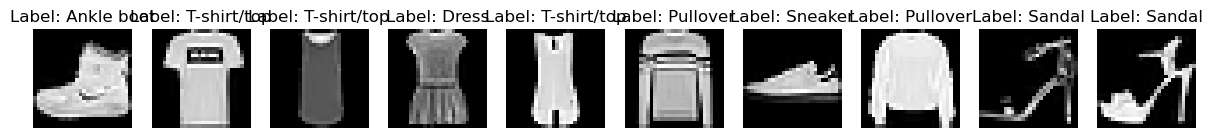

In [138]:
# Fashion-MNIST'deki etiketlerin isimleri
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# İlk 10 örneği görselleştir
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {class_names[y_train[i]]}")
    ax.axis('off')
plt.show()

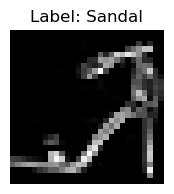

In [139]:
sandal_indices = np.where(y_train == 5)[0]  # 5, Sandal etiketinin indeksidir
sandal_image = X_train[sandal_indices[0]]  # İlk sandal görselini al
plt.figure(figsize=(2, 2))
# Görseli göster
plt.imshow(sandal_image, cmap='gray')
plt.title(f"Label: {class_names[5]}")
plt.axis('off')
plt.show()

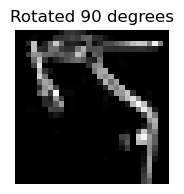

In [140]:
# 90 derece döndürme
rotated_image = np.rot90(sandal_image)
plt.figure(figsize=(2, 2))
# Döndürülmüş görseli göster
plt.imshow(rotated_image, cmap='gray')
plt.title(f"Rotated 90 degrees")
plt.axis('off')
plt.show()

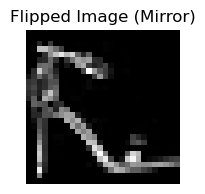

In [141]:
# Yatay ayna görüntüsü (sol-sağ yansıma)
flipped_image = np.fliplr(sandal_image)
plt.figure(figsize=(2, 2))
# Yansımalı görseli göster
plt.imshow(flipped_image, cmap='gray')
plt.title(f"Flipped Image (Mirror)")
plt.axis('off')
plt.show()

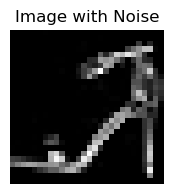

In [142]:
def add_noise(image, noise_factor=0.5):
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0., 255.)  # Piksel değerini 0-255 arasında tut
    return noisy_image

# Gürültü eklenmiş görseli oluştur
noisy_image = add_noise(sandal_image)
plt.figure(figsize=(2, 2))
# Gürültü eklenmiş görseli göster
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Image with Noise")
plt.axis('off')
plt.show()

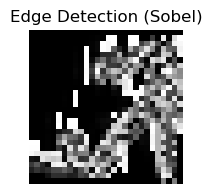

In [143]:
from scipy.ndimage import sobel

# Sobel kenar algılama filtresi
edges_image = sobel(sandal_image)
plt.figure(figsize=(2, 2))
# Kenar algılama görselini göster
plt.imshow(edges_image, cmap='gray')
plt.title(f"Edge Detection (Sobel)")
plt.axis('off')
plt.show()

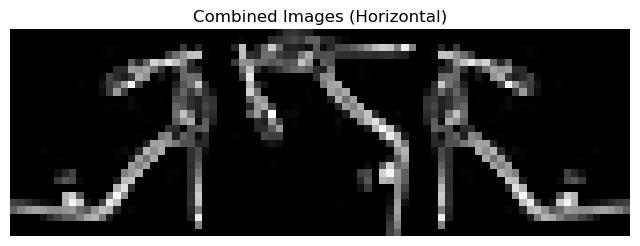

In [144]:
combined_horizontal = np.concatenate([sandal_image, rotated_image, flipped_image], axis=1)
plt.figure(figsize=(8, 8))
# Birleştirilmiş görseli göster
plt.imshow(combined_horizontal, cmap='gray')  # Orijinal görüntü gri tonlamalı olduğu için cmap='gray' kullanıyoruz
plt.title("Combined Images (Horizontal)")
plt.axis('off')
plt.show()

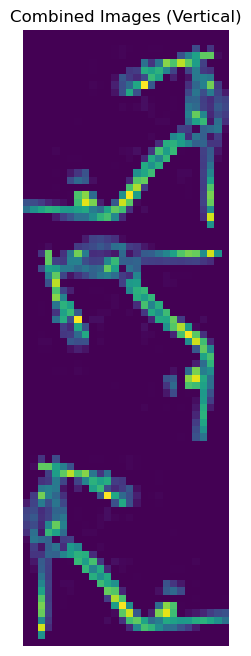

In [145]:
# Görselleri üst üste birleştirme
combined_vertical = np.concatenate([sandal_image, rotated_image, flipped_image], axis=0)
plt.figure(figsize=(8, 8))
# Birleştirilmiş görseli göster
plt.imshow(combined_vertical)
plt.title("Combined Images (Vertical)")
plt.axis('off')
plt.show()

In [146]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Original vs Rotated - MSE: 51.50, SSIM: -0.0009, PSNR: 31.01 dB
Original vs Flipped - MSE: 53.73, SSIM: 0.0015, PSNR: 30.83 dB


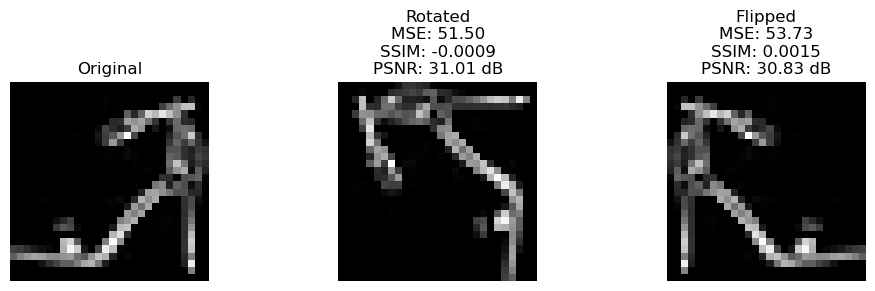

In [184]:
# Görüntüleri gri tonlamaya çevir (MSE, SSIM için gerekli)
def preprocess(image):
    return image if len(image.shape) == 2 else cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# MSE hesaplama fonksiyonu
# MSE düşükse → Görseller benzerdir.
def mse(imageA, imageB):
    err = np.mean((imageA - imageB) ** 2)
    return err

# PSNR hesaplama fonksiyonu
# PSNR yüksekse → Gürültü veya bozulma azdır.
def psnr(imageA, imageB):
    mse_val = mse(imageA, imageB)
    if mse_val == 0:
        return 100  # Eğer MSE sıfırsa, tamamen aynı görüntülerdir.
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse_val))
    return psnr_value

# Görselleri kıyasla
original = preprocess(sandal_image)
rotated = preprocess(rotated_image)
flipped = preprocess(flipped_image)

# MSE, SSIM, PSNR değerlerini hesapla
mse_rotated = mse(original, rotated)
ssim_rotated = ssim(original, rotated, data_range=255)  # SSIM yüksekse (1'e yakınsa) → Görseller yapısal olarak çok benzer.
psnr_rotated = psnr(original, rotated)

mse_flipped = mse(original, flipped)
ssim_flipped = ssim(original, flipped, data_range=255)
psnr_flipped = psnr(original, flipped)

# Sonuçları yazdır
print(f"Original vs Rotated - MSE: {mse_rotated:.2f}, SSIM: {ssim_rotated:.4f}, PSNR: {psnr_rotated:.2f} dB")
print(f"Original vs Flipped - MSE: {mse_flipped:.2f}, SSIM: {ssim_flipped:.4f}, PSNR: {psnr_flipped:.2f} dB")

# Görselleri karşılaştırmalı olarak göster
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(rotated, cmap='gray')
axes[1].set_title(f"Rotated\nMSE: {mse_rotated:.2f}\nSSIM: {ssim_rotated:.4f}\nPSNR: {psnr_rotated:.2f} dB")
axes[1].axis('off')

axes[2].imshow(flipped, cmap='gray')
axes[2].set_title(f"Flipped\nMSE: {mse_flipped:.2f}\nSSIM: {ssim_flipped:.4f}\nPSNR: {psnr_flipped:.2f} dB")
axes[2].axis('off')

plt.tight_layout()
plt.show()

Original vs Rotated - MSE: 52.77, SSIM: 0.1009, PSNR: 30.91 dB
Original vs Flipped - MSE: 0.17, SSIM: 0.9982, PSNR: 55.87 dB


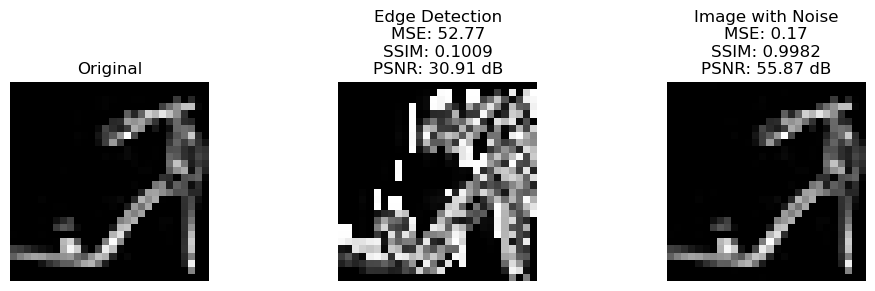

In [198]:
from skimage.metrics import structural_similarity as ssim

import cv2

# Görüntüleri gri tonlamaya çevir (MSE, SSIM için gerekli)
def preprocess(image):
    return image if len(image.shape) == 2 else cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# MSE hesaplama fonksiyonu
# MSE düşükse → Görseller benzerdir.
def mse(imageA, imageB):
    err = np.mean((imageA - imageB) ** 2)
    return err

# PSNR hesaplama fonksiyonu
# PSNR yüksekse → Gürültü veya bozulma azdır.
def psnr(imageA, imageB):
    mse_val = mse(imageA, imageB)
    if mse_val == 0:
        return 100  # Eğer MSE sıfırsa, tamamen aynı görüntülerdir.
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse_val))
    return psnr_value

# Görselleri kıyasla
original = preprocess(sandal_image)
edge = preprocess(edges_image)
noise = preprocess(noisy_image)

# MSE, SSIM, PSNR değerlerini hesapla
mse_edge = mse(original, edge)
ssim_edge = ssim(original, edge, data_range=255)  # SSIM yüksekse (1'e yakınsa) → Görseller yapısal olarak çok benzer.
psnr_edge = psnr(original, edge)

mse_noise = mse(original, noise)
ssim_noise = ssim(original, noise, data_range=255)
psnr_noise = psnr(original, noise)

# Sonuçları yazdır
print(f"Original vs Rotated - MSE: {mse_edge:.2f}, SSIM: {ssim_edge:.4f}, PSNR: {psnr_edge:.2f} dB")
print(f"Original vs Flipped - MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.4f}, PSNR: {psnr_noise:.2f} dB")

# Görselleri karşılaştırmalı olarak göster
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(edge, cmap='gray')
axes[1].set_title(f"Edge Detection\nMSE: {mse_edge:.2f}\nSSIM: {ssim_edge:.4f}\nPSNR: {psnr_edge:.2f} dB")
axes[1].axis('off')

axes[2].imshow(noise, cmap='gray')
axes[2].set_title(f"Image with Noise\nMSE: {mse_noise:.2f}\nSSIM: {ssim_noise:.4f}\nPSNR: {psnr_noise:.2f} dB")
axes[2].axis('off')

plt.tight_layout()
plt.show()

